In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import Thermobar as pt
from pickle import load
import pickle

## First, lets load Cpx data

In [2]:
with open(r'../Combo_Cpx.pkl', 'rb') as f:
            All_Cpx=load(f)
CraterLake_Cpx=All_Cpx.loc[All_Cpx['Volcano']=="CraterLake"]
CraterLake_Cpx['Volcano']="Crater Lake"

C:\Users\penny\AppData\Local\Temp\ipykernel_29724\2148374806.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CraterLake_Cpx['Volcano']="Crater Lake"


In [3]:
All_Cpx['Volcano'].unique()

array(['GVB', 'Baker', 'Glacier', 'Rainier', 'Adams', 'MSH', 'Hood',
       'MedicineLake', 'Jefferson', 'North Sister', 'South Sister',
       'CraterLake', 'Shasta', 'Lassen'], dtype=object)

## Splitting into Petrelli and Wang

In [4]:
WangCopy=CraterLake_Cpx.copy()
WangCopy['Preferred_P']=WangCopy['P_Wang21_eq1']
WangCopy['Model']="Wang"
JorgensonCopy=CraterLake_Cpx.copy()
JorgensonCopy['Preferred_P']=JorgensonCopy['P_Jorgenson22']
JorgensonCopy['Model']="Jorgenson"

Combo_Cpx=pd.concat([WangCopy, JorgensonCopy], axis=0)

In [5]:
rho=2700
P_axis_min=-3
P_axis_max=12
D_axis_min=100000*P_axis_min/(9.8*rho)
D_axis_max=100000*P_axis_max/(9.8*rho)


In [6]:
len(WangCopy)

333

In [7]:
Combo_Cpx['Volcano'].unique()

array(['Crater Lake'], dtype=object)

In [8]:
Combo_Cpx['Preferred_P'].loc[(Combo_Cpx['Model']=="Wang")
                                        &(Combo_Cpx["Volcano"]=="Crater Lake")]

0      1.252668
1      1.649548
2      1.233271
3      1.055356
4      0.546042
         ...   
328   -2.077082
329   -1.755523
330   -0.653637
331   -1.908139
332   -1.075896
Name: Preferred_P, Length: 333, dtype: float64

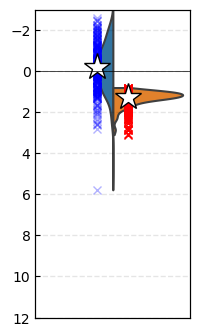

In [9]:
import seaborn as sns
fig, (ax1) = plt.subplots(1, 1, figsize=(2,4), sharey=True)
ax2 = ax1.twinx()

volc_order=["Crater Lake"]
sns.violinplot(x="Volcano", y="Preferred_P",  cut=0,  inner=None, hue="Model",
            data=Combo_Cpx, split=True, ax=ax1, width=0.9, order=volc_order, stick=True)

ax1.plot(-0.1+0*Combo_Cpx['Preferred_P'].loc[(Combo_Cpx['Model']=="Wang")
                                        &(Combo_Cpx["Volcano"]=="Crater Lake")],
      Combo_Cpx['Preferred_P'].loc[(Combo_Cpx['Model']=="Wang")
                                        &(Combo_Cpx["Volcano"]=="Crater Lake")],  
         'xb', alpha=0.3)

ax1.plot(0.1+0*Combo_Cpx['Preferred_P'].loc[(Combo_Cpx['Model']=="Jorgenson")
                                        &(Combo_Cpx["Volcano"]=="Crater Lake")],
      Combo_Cpx['Preferred_P'].loc[(Combo_Cpx['Model']=="Jorgenson")
                                        &(Combo_Cpx["Volcano"]=="Crater Lake")],  
         'xr')

ax1.plot(-0.1,
      np.nanmedian(Combo_Cpx['Preferred_P'].loc[(Combo_Cpx['Model']=="Wang")
                                        &(Combo_Cpx["Volcano"]=="Crater Lake")]),  
         '*k', mfc='w', ms=20)

ax1.plot(0.1,
      np.nanmedian(Combo_Cpx['Preferred_P'].loc[(Combo_Cpx['Model']=="Jorgenson")
                                        &(Combo_Cpx["Volcano"]=="Crater Lake")]),  
         '*k', mfc='w', ms=20)



ax1.plot([-1, 5], [0, 0], '-k', lw=0.5)
ax1.set_ylim([P_axis_max, P_axis_min])
ax2.set_ylim([D_axis_max, D_axis_min])
ax1.set_xlim([-0.5, 0.5])
ax1.set_xticks([])
ax1.get_legend().remove()
ax1.set_xlabel(None)
ax1.set_ylabel(None)
ax1.tick_params(direction="in")
ax2.tick_params(direction="in")
ax1.grid(color = 'k', linestyle = '--', axis='y',linewidth = 1, alpha = 0.1, zorder=0)
ax2.set_yticks([])
fig.savefig('Crater_Cpx.png', dpi=200)

In [10]:
print('Jorgenson Median pressure')
print(np.nanmedian(Combo_Cpx['Preferred_P'].loc[(Combo_Cpx['Model']=="Jorgenson")]))


Jorgenson Median pressure
1.242748756218906


In [11]:
print('Jorgenson Median pressure')
print(np.nanmedian(Combo_Cpx['Preferred_P'].loc[(Combo_Cpx['Model']=="Wang")]))


Jorgenson Median pressure
-0.19269108448018457


In [12]:
print('Jorgenson Mean')
print(np.nanmean(Combo_Cpx['Preferred_P'].loc[(Combo_Cpx['Model']=="Wang")])
     -np.nanstd(Combo_Cpx['Preferred_P'].loc[(Combo_Cpx['Model']=="Wang")])
     )


Jorgenson Mean
-1.2812063843504364


In [13]:
cpx_cpn=pt.calculate_clinopyroxene_components(cpx_comps=CraterLake_Cpx)

C:\Users\penny\anaconda3\lib\site-packages\pandas\core\indexing.py:2120: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)


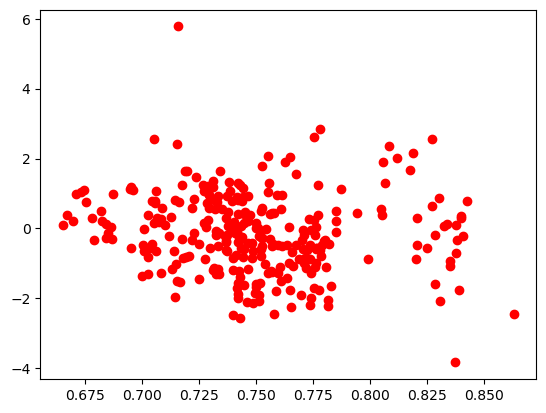

In [14]:
plt.plot(cpx_cpn['Mgno_Cpx'], CraterLake_Cpx['P_Wang21_eq1'], 'or')

In [15]:
Combo_Cpx

,P_Wang21_eq1,T_Wang21_eq2,T_Jorgenson22,P_Jorgenson22,T_Petrelli20,T_Petrelli21_H2O,P_Petrelli21_H2O,T_Put_Teq32d_Peq32a,T_Put_Teq32d_Peq32b,P_Petrelli20,...,SampleID,Total,NiO,Stage,test_total,Unnamed: 16,Phase,Preferred_P,Preferred_P2,Model
0,1.252668,1385.668381,1309.214677,0.804102,1297.474444,1350.441111,0.782291,1412.240204,1423.078168,0.928709,...,NaN,NaN,NaN,NaN,NaN,NaN,Cpx,1.252668,0.804102,Wang
1,1.649548,1393.584976,1322.841542,0.911194,1275.094444,1347.505556,0.957044,1412.221882,1429.404233,1.391891,...,NaN,NaN,NaN,NaN,NaN,NaN,Cpx,1.649548,0.911194,Wang
2,1.233271,1391.180584,1320.140050,0.861975,1295.645556,1346.338889,1.213500,1408.435603,1423.020055,1.349667,...,NaN,NaN,NaN,NaN,NaN,NaN,Cpx,1.233271,0.861975,Wang
3,1.055356,1390.725994,1306.349005,0.929769,1275.743333,1347.338889,1.174362,1406.937766,1420.153549,1.742933,...,NaN,NaN,NaN,NaN,NaN,NaN,Cpx,1.055356,0.929769,Wang
4,0.546042,1387.224210,1304.005721,1.368393,1310.825556,1356.037778,1.706631,1404.370896,1409.586320,1.713789,...,NaN,NaN,NaN,NaN,NaN,NaN,Cpx,0.546042,1.368393,Wang
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328,-2.077082,1376.051595,1307.941045,1.084816,1274.412222,1349.065556,1.735845,1351.513836,1349.392955,2.045471,...,NaN,NaN,NaN,NaN,NaN,NaN,Cpx,1.084816,1.084816,Jorgenson
329,-1.755523,1386.975456,1314.473383,1.322147,1280.816667,1358.798889,2.014507,1372.575312,1371.421703,2.246282,...,NaN,NaN,NaN,NaN,NaN,NaN,Cpx,1.322147,1.322147,Jorgenson
330,-0.653637,1381.506514,1330.224627,1.275488,1280.354444,1359.754444,1.313547,1395.355757,1397.338542,1.763360,...,NaN,NaN,NaN,NaN,NaN,NaN,Cpx,1.275488,1.275488,Jorgenson
331,-1.908139,1381.200246,1308.306716,1.056649,1273.238889,1353.283333,1.743038,1371.715620,1372.860109,2.131673,...,NaN,NaN,NaN,NaN,NaN,NaN,Cpx,1.056649,1.056649,Jorgenson


## Amphibole data

233
229


C:\Users\penny\AppData\Local\Temp\ipykernel_29724\87757401.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CraterLake_Amp['Sample_ID_Amp']="CraterLake"
C:\Users\penny\AppData\Local\Temp\ipykernel_29724\87757401.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CraterLake_Amp_Filt['Sample_ID_Amp']="CraterLake"
C:\Users\penny\AppData\Local\Temp\ipykernel_29724\87757401.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexe

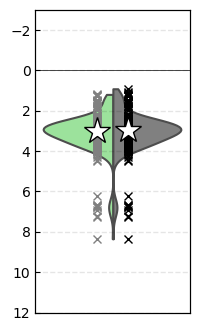

In [16]:

with open(r'../Combo_Amp.pkl', 'rb') as f:
            All_Amp=load(f)
CraterLake_Amp=All_Amp.loc[All_Amp['Volcano']=="CraterLake"]
CraterLake_Amp['Sample_ID_Amp']="CraterLake"

with open(r'../Combo_Amp_Filt.pkl', 'rb') as f:
            All_Amp_Filt=load(f)
CraterLake_Amp_Filt=All_Amp_Filt.loc[All_Amp_Filt['Volcano']=="CraterLake"]
CraterLake_Amp_Filt['Sample_ID_Amp']="CraterLake"
CraterLake_Amp['Class']='Unfilt'
CraterLake_Amp_Filt['Class']='filt'

Combo_Amp=pd.concat([CraterLake_Amp_Filt, CraterLake_Amp], axis=0)

print(sum(CraterLake_Amp['P_kbar_calc']>-10))
print(sum(CraterLake_Amp_Filt['P_kbar_calc']>-10))

import seaborn as sns
fig, (ax1) = plt.subplots(1, 1, figsize=(2,3.93), sharey=True)
ax2 = ax1.twinx()


# ax = sns.violinplot(y=CraterLake_Amp['P_Ridolfi21'],
#                 inner=None, cut=0, ax=ax1, color="lightgreen", linewidth=0.5)
sns.violinplot(x="Volcano", y="P_Ridolfi21",  cut=0,  inner=None, hue="Class",
            data=Combo_Amp, split=True, ax=ax1, width=0.9,  palette=['lightgreen', 'grey'],
               stick=True)


ax1.plot(-0.1+0*CraterLake_Amp_Filt['P_Ridolfi21'],
  CraterLake_Amp_Filt['P_Ridolfi21'],
         'x', mec='grey')
ax1.plot(+0.1+0*CraterLake_Amp['P_Ridolfi21'],
  CraterLake_Amp['P_Ridolfi21'],
         'x', mec='black')

ax1.plot(-0.1,
  np.nanmedian(CraterLake_Amp_Filt['P_Ridolfi21']),
         '*k', mfc='w', ms=20)

ax1.plot(+0.1,
  np.nanmedian(CraterLake_Amp['P_Ridolfi21']),
         '*k', mfc='w', ms=20)
ax1.get_legend().remove()
ax1.plot([-1, 5], [0, 0], '-k', lw=0.5)
ax1.set_ylim([P_axis_max, P_axis_min])
ax2.set_ylim([D_axis_max, D_axis_min])
ax1.set_xlim([-0.5, 0.5])
ax1.set_xlabel(None)
ax1.set_ylabel(None)

ax1.tick_params(direction="in")
ax2.tick_params(direction="in")
ax2.set_yticks([])
ax1.set_xticks([])
ax1.grid(color = 'k', linestyle = '--', axis='y',linewidth = 1, alpha = 0.1, zorder=0)


fig.savefig('CraterLake_Amp.png', dpi=200, transparent=True)

In [17]:
np.nanmedian(CraterLake_Amp['P_Ridolfi21'])

2.9665490198043694

In [18]:
np.nanmedian(CraterLake_Amp_Filt['P_Ridolfi21'])

2.9794234916765547

In [56]:
len(CraterLake_Amp)

241

In [13]:
## Load in LP data

In [14]:
LPs=pd.read_excel(r'C:\Users\penny\OneDrive - Oregon State University\Postdoc\Compilations\Geophysics_Jan2021.xlsx',
                  sheet_name="LPEarthquakes")
LPs_Crater=LPs.loc[LPs['Volcano']=="Crater Lake"]
LPs_Crater

,Volcano,Latitude,Depth,Depth definition,Reference,Unnamed: 5,Unnamed: 6
22,Crater Lake,42.5846,32.0,"presume below surface, as none at + depths",Nichols et al. 2011,NaN,NaN


## Raw template for geophysics and Exp Pet

In [6]:
len(Crater_Amp_Press_NoFilter)

245